# Proyecto_MD 

In [1]:
# Imports a utilizar 
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Apertura del Archivo

In [2]:
data = pd.read_excel('GrupedData.xlsx')

In [3]:
data.columns

Index(['Número de hijos(as)', 'Total', 'Ninguno', 'Primaria', 'Básica',
       'Diversificado', 'Universitario', 'Post grado', 'Doctorado', 'Ignorado',
       'Año'],
      dtype='object')

In [4]:
data.dtypes

Número de hijos(as)    object
Total                   int64
Ninguno                 int64
Primaria                int64
Básica                  int64
Diversificado           int64
Universitario           int64
Post grado              int64
Doctorado               int64
Ignorado                int64
Año                     int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Número de hijos(as)  232 non-null    object
 1   Total                232 non-null    int64 
 2   Ninguno              232 non-null    int64 
 3   Primaria             232 non-null    int64 
 4   Básica               232 non-null    int64 
 5   Diversificado        232 non-null    int64 
 6   Universitario        232 non-null    int64 
 7   Post grado           232 non-null    int64 
 8   Doctorado            232 non-null    int64 
 9   Ignorado             232 non-null    int64 
 10  Año                  232 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 20.1+ KB


## Descripción de los datos

In [6]:
columns = data.columns
numeric_data = data._get_numeric_data().columns

categorical_data = set(columns) - set(numeric_data)
print("-> Columnas con valores numericos \n ",numeric_data ,'\n')
print("-> Columnas con valores categoricos\n ",categorical_data)

-> Columnas con valores numericos 
  Index(['Total', 'Ninguno', 'Primaria', 'Básica', 'Diversificado',
       'Universitario', 'Post grado', 'Doctorado', 'Ignorado', 'Año'],
      dtype='object') 

-> Columnas con valores categoricos
  {'Número de hijos(as)'}


Limpieza de variables 

In [7]:
columnas_a_eliminar = ['Total','Ignorado']
datos = clean(data, method = 'dropcols', columns = columnas_a_eliminar)

In [8]:
# Selección de filas que no contienen "Ignorado" o "Todos los hijos"
datos = datos.loc[~data.iloc[:, 0].isin(['Ignorado', 'Todos los hijos']), :]

# Verificación del resultado
print(datos.head())


  Número de hijos(as)  Ninguno  Primaria  Básica  Diversificado  \
1                   1    12790     40261   23825          29553   
2                   2    11270     38161   17748          18631   
3                   3     9822     26367    8798           8307   
4                   4     7831     14330    2963           2071   
5                   5     6179      7342     972            567   

   Universitario  Post grado  Doctorado   Año  
1           2803          91          0  2021  
2           1937          28          0  2021  
3            792           0          0  2021  
4            149           3          0  2021  
5             35           1          0  2021  


In [9]:
datos.columns

Index(['Número de hijos(as)', 'Ninguno', 'Primaria', 'Básica', 'Diversificado',
       'Universitario', 'Post grado', 'Doctorado', 'Año'],
      dtype='object')

In [10]:
datos

Número de hijos(as)  Ninguno  Primaria  Básica  Diversificado  \
1                     1    12790     40261   23825          29553   
2                     2    11270     38161   17748          18631   
3                     3     9822     26367    8798           8307   
4                     4     7831     14330    2963           2071   
5                     5     6179      7342     972            567   
..                  ...      ...       ...     ...            ...   
226                  14      136        37       0              0   
227                  15       65        15       0              0   
228                  16       18         8       0              0   
229                  17        9         1       0              0   
230                  18        3         1       0              0   

     Universitario  Post grado  Doctorado   Año  
1             2803          91          0  2021  
2             1937          28          0  2021  
3              792           0          0  2021  
4              149           3          0  2021  
5               35           1          0  2021  
..             ...         ...        ...   ...  
226              0           0          0  2010  
227              0           0          0  2010  
228              0           0          0  2010  
229              0           0          0  2010  
230              0           0          0  2010  

[208 rows x 9 columns]

In [11]:
datos.shape

(208, 9)

In [12]:
datos.dtypes

Número de hijos(as)    object
Ninguno                 int64
Primaria                int64
Básica                  int64
Diversificado           int64
Universitario           int64
Post grado              int64
Doctorado               int64
Año                     int64
dtype: object

## Análisis exploratorio 

Como se pudo observar en la sección de descripción de datos, se cuenta únicamente con variables cuantitativas. Es por esto que realizaremos un análisis de estas mismas utilizando histogramas y diagramas de cajas y bigotes para comprender mejor el data set.

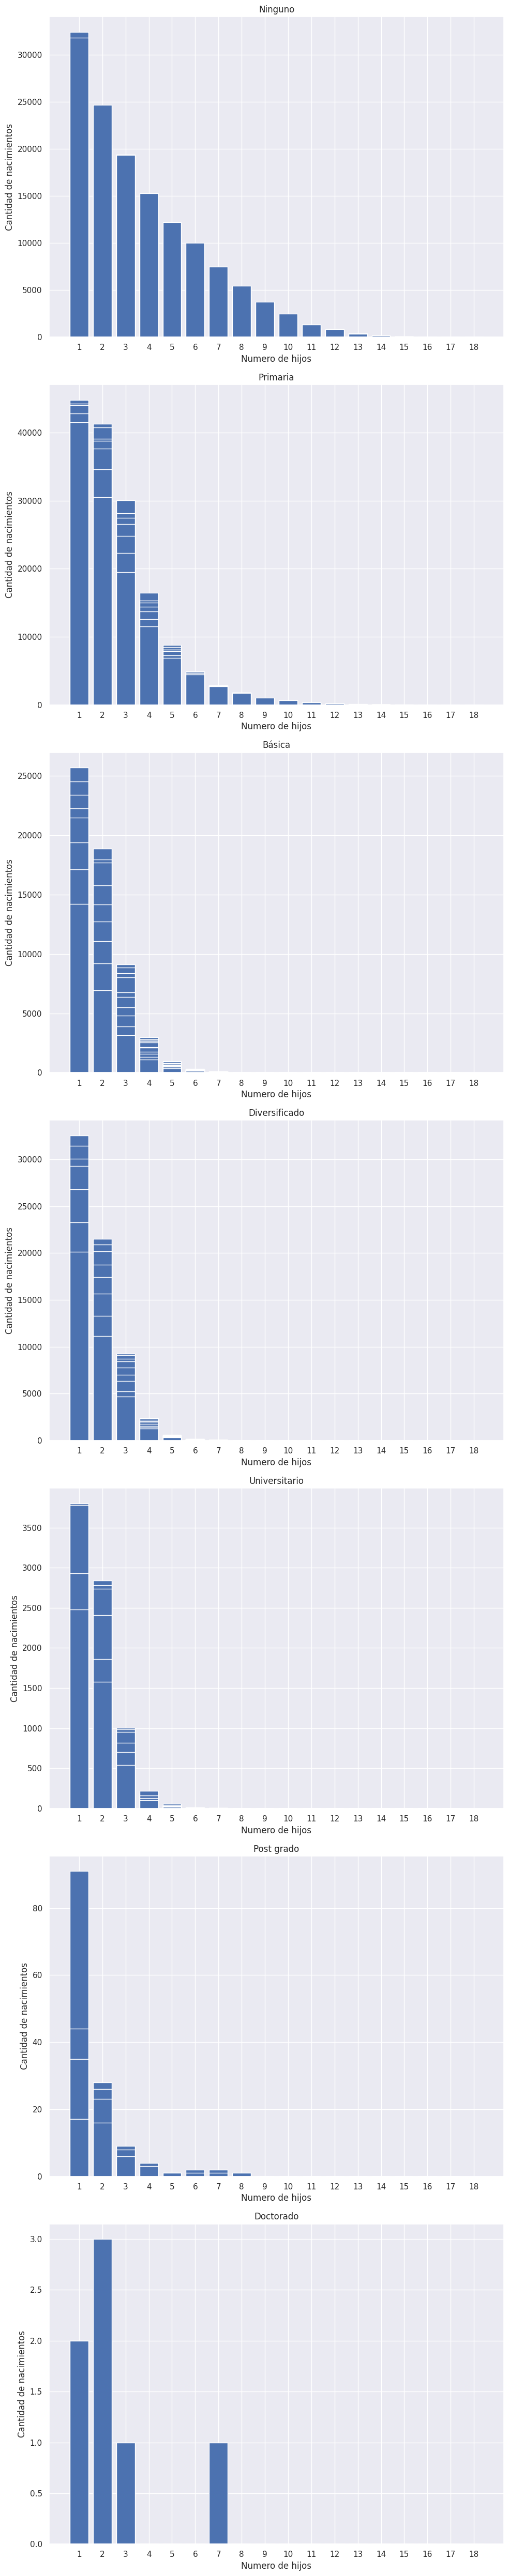

In [13]:
data_barras = datos.iloc[:,1:-1]

x_values = datos.iloc[:, 0].astype(str)

# Crear histogramas por columna con valores en el eje x
fig, axs = plt.subplots(nrows=len(data_barras.columns), figsize=(10, 50))
for i, column in enumerate(data_barras.columns):
    axs[i].bar(x_values, data_barras[column])
    axs[i].set_xlabel('Numero de hijos')
    axs[i].set_ylabel('Cantidad de nacimientos')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

al observar los gráficos de barras podemos saber que variable presenta una distribución de mayor magnitud en el data set. Podemos ver que el nivel de escolaridad "Ninguno" o sin ningún tipo de escolaridad es el que presenta una una tendencia de una mayor tasa de natalidad de todos los niveles de estudios. Así mismo se nota la tendencia de los datos a mostrar que una madre normalmente tuvo menos hijos (de 1 a 4 hijos)  pero también podemos encontrar datos en este mismo nivel de escolaridad con una mayor magnitud para una mayor cantidad de hijos (5 hasta 18 hijos). 

En cuanto a los niveles de educación primaria, básica y diversificado podemos ver que a medida que el nivel de escolaridad va aumentando la tasa de natalidad va disminuyendo en magnitud. Así mismo siempre se mantiene la tendencia de una mayor magnitud o más madres que tuvieron de 1 a 4 hijos. En estos gráficos ya tenemos barras que representen una gran magnitud de madres con más de 10 hijos. 

Continuando con los niveles de escolaridad universitario y postgrado podemos ver que la data se reduce drásticamente en la tasa de natalidad en madres con un hijo. Este pasa de estar arriba de 30,000 madres con nivel de escolaridad diversificado con un hijo a al rededor de 3,500 madres con nivel de escolaridad Universitario que tienen un solo hijo. Luego podemos ver en el gráfico de postgrado que nos muestra que este la mayor cantidad de madres con un hijo redondea los 80 casos. Cabe mencionar que se mantiene la tendencia que a mayor nivel de escolaridad la magnitud de madres con menos hijos disminuye y la de madres que tienen muchos hijos va siendo casi nula. 

Finalmente en cuanto a los casos con nivel de escolaridad de doctorado, tenemos una distribución de muy pocos casos denotando que en este alto nivel de escolaridad tenemos muy pocas madres que tuvieron hijos al cursar este mismo nivel de escolaridad. Esto se puede justificar pues comunmente las personas no tan jóvenes son los que comienzan a cursar un doctorado. 

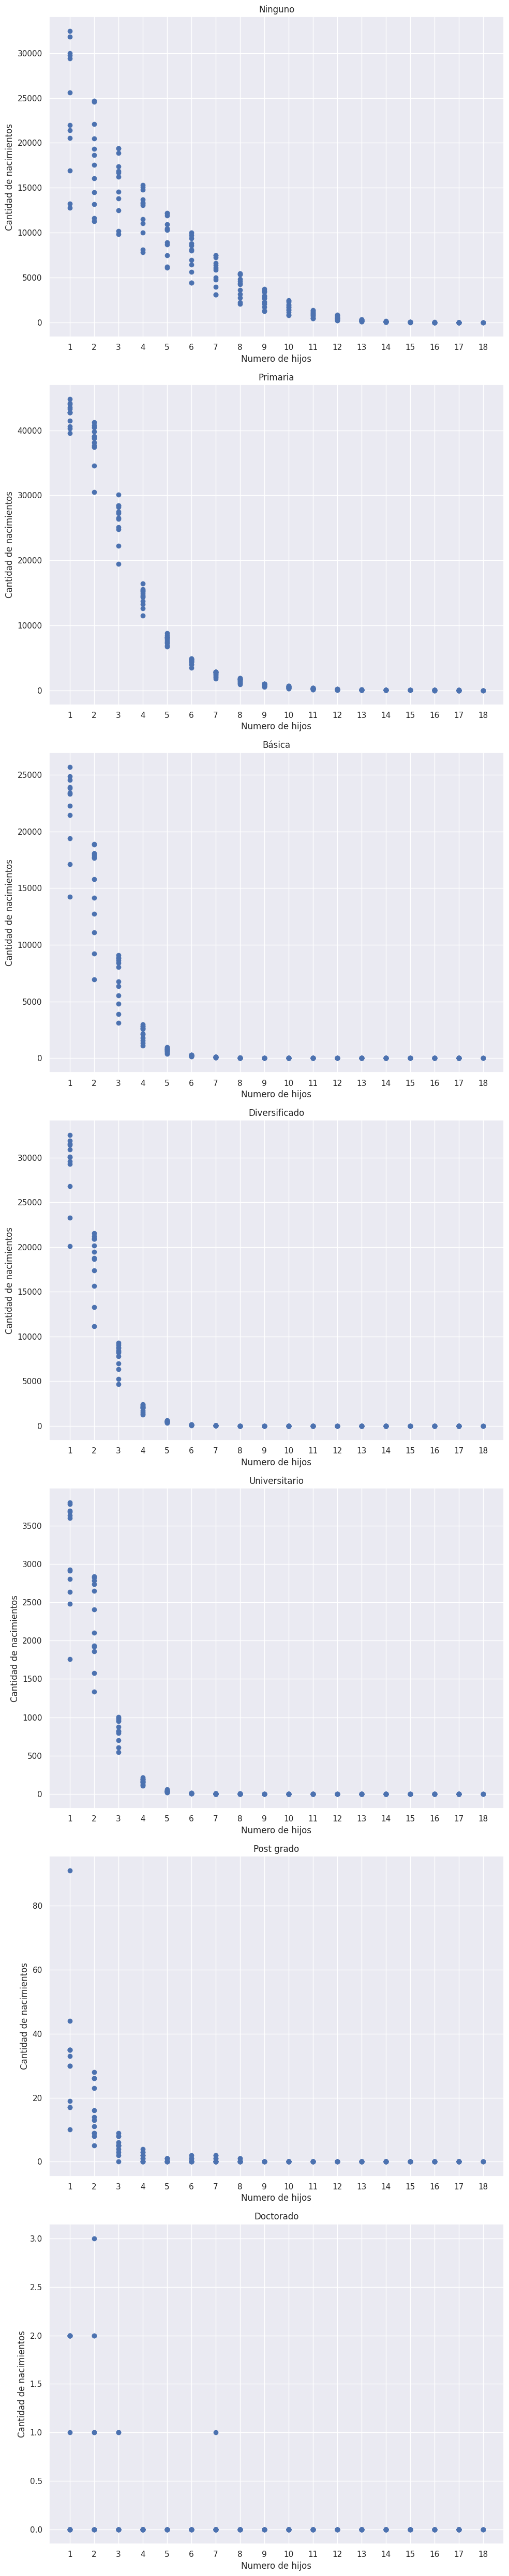

In [14]:
data_dispersion = datos.iloc[:,1:-1]

x_values = x_values = datos.iloc[:, 0].astype(str)

fig, axs = plt.subplots(nrows=len(data_dispersion.columns), figsize=(10, 50))
for i, column in enumerate(data_dispersion.columns):
    axs[i].scatter(x_values, data_dispersion[column])
    axs[i].set_xlabel('Numero de hijos')
    axs[i].set_ylabel('Cantidad de nacimientos')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()





se usa zscore para saber la desviacion de cada dato en su columna.

In [15]:
from scipy.stats import zscore

data_zscore = datos.iloc[:,1:-1].apply(zscore, axis=0)
print(data_zscore)


      Ninguno  Primaria    Básica  Diversificado  Universitario  Post grado  \
1    0.920175  2.391583  3.416638       3.341641       2.710607    9.012931   
2    0.717493  2.235766  2.433081       1.950572       1.745376    2.541400   
3    0.524411  1.360671  0.984532       0.635667       0.469176   -0.334837   
4    0.258924  0.467545  0.040142      -0.158575      -0.247502   -0.026668   
5    0.038641 -0.050953 -0.282099      -0.350130      -0.374565   -0.232114   
..        ...       ...       ...            ...            ...         ...   
226 -0.767154 -0.592972 -0.439416      -0.422346      -0.413575   -0.334837   
227 -0.776622 -0.594605 -0.439416      -0.422346      -0.413575   -0.334837   
228 -0.782889 -0.595124 -0.439416      -0.422346      -0.413575   -0.334837   
229 -0.784089 -0.595643 -0.439416      -0.422346      -0.413575   -0.334837   
230 -0.784889 -0.595643 -0.439416      -0.422346      -0.413575   -0.334837   

     Doctorado  
1    -0.250727  
2    -0.250727  


Al obtener los valores del zscore se obtiene el dato de un valor en la tabla de distribución z para saber por cuantas desviaciones estándar se encuentra un dato en especifico de su media. En ese caso un valor de zscore cercano a 0 significa que está cerca de la media y a medida que se aleja de 0  este valor se está alejando de la media. Este valor y al utilizar la tabla de valores z podemos obtener y determinar que porcentaje de los datos del data set se encuentran por arriba o por debajo de un dato en especifico. Por ejemplo si tenemos un zscore de 0.92 podemos decir que ese dato esta 0.92 desviaciones estándar encima de la media. Así mismo podemos decir usando el valor de la tabla z que aproximadamente un 82% de las observaciones en la distribución de los datos se encuentra por debajo de ese valor. 

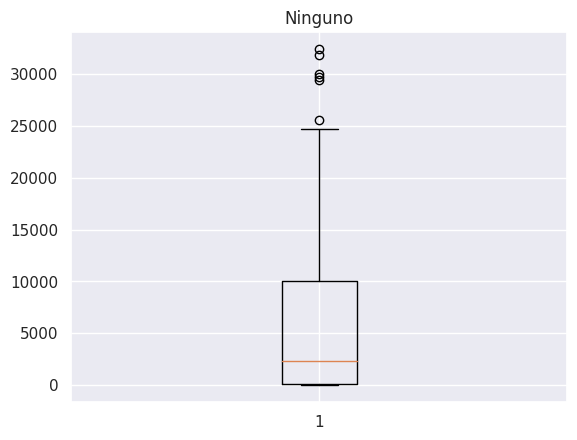

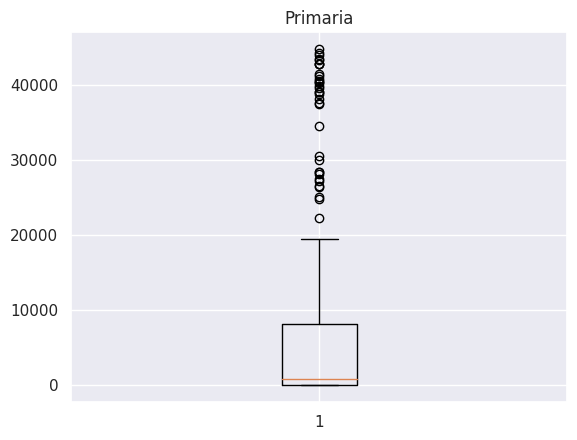

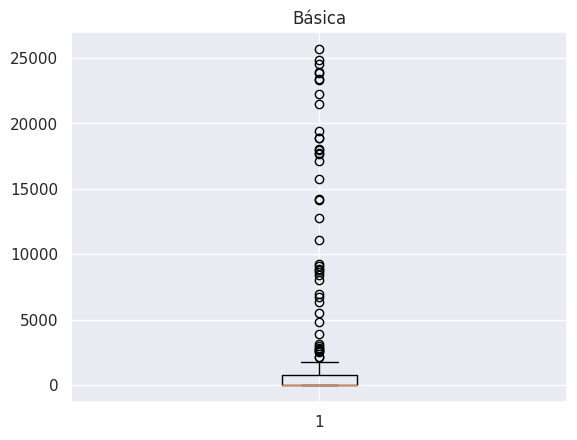

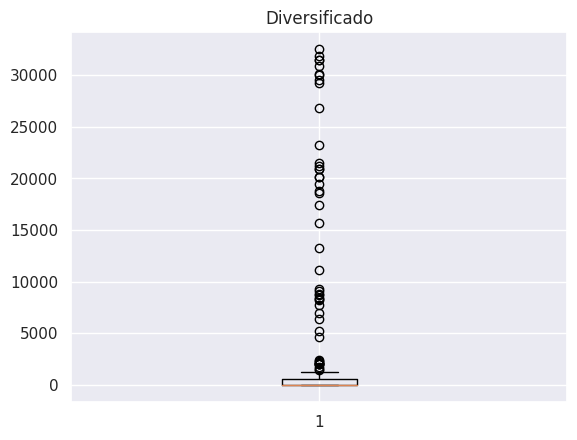

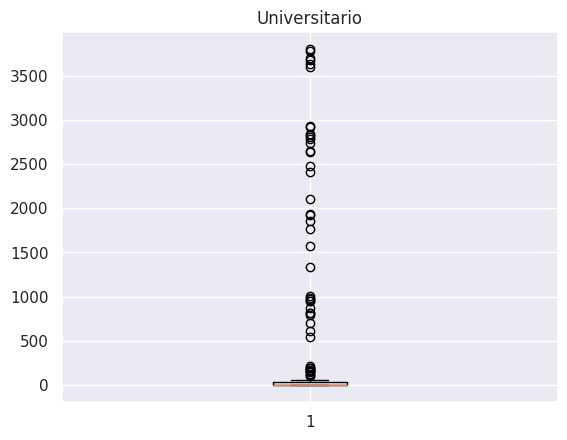

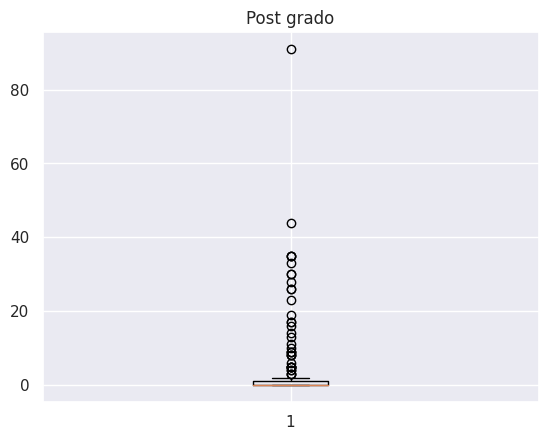

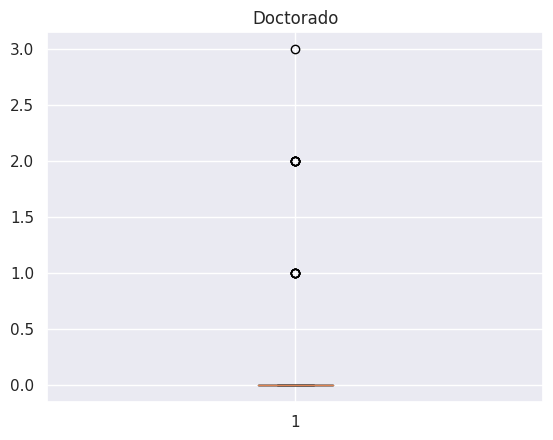

In [16]:
for col in datos.iloc[:,1:-1].columns:
    fig, ax = plt.subplots()
    ax.boxplot(datos[col])
    ax.set_title(col)
    plt.show()

Al observar el gráfico de dispersión y el rating de zscore (desviación estándar de cada dato por columna) podemos observar que la mayor dispersión de los datos y menor desviación se encuentra en el aquellas madres que no tienen un nivel de escolaridad. Esto pues tenemos un conjunto de madres sin un nivel de escolaridad que tiene la tendencia a tener más hijos y por lo tanto en este caso se puede decir que es más común que al no tener un nivel de escolaridad se tienen más hijos y una tasa de natalidad mucho mayor.

In [17]:
datos.columns

Index(['Número de hijos(as)', 'Ninguno', 'Primaria', 'Básica', 'Diversificado',
       'Universitario', 'Post grado', 'Doctorado', 'Año'],
      dtype='object')

In [18]:
eda_num(datos.iloc[:,:-1], method="correlation")

Correlation Analysis - Heatmap


Al observar la correlación de las variables sabemos que todas tienen una correlación positiva entre ellas mismas. Sin embargo notamos que hay una tendencia en los datos que un nivel de escolaridad tiene siempre una correlación positiva pero cada vez menos fuerte a medida que se va aumentando el nivel de estudios. 

### Determinar clúster y agrupamiento.

Para determinar una tendencia en el agrupamiento y la mejor cantidad de clúster realizaremos lo siguiente...

In [19]:
datos = datos.iloc[:,:-1]
print(datos)

    Número de hijos(as)  Ninguno  Primaria  Básica  Diversificado  \
1                     1    12790     40261   23825          29553   
2                     2    11270     38161   17748          18631   
3                     3     9822     26367    8798           8307   
4                     4     7831     14330    2963           2071   
5                     5     6179      7342     972            567   
..                  ...      ...       ...     ...            ...   
226                  14      136        37       0              0   
227                  15       65        15       0              0   
228                  16       18         8       0              0   
229                  17        9         1       0              0   
230                  18        3         1       0              0   

     Universitario  Post grado  Doctorado  
1             2803          91          0  
2             1937          28          0  
3              792           0         

In [27]:
from sklearn.cluster import KMeans
#x = datos
x = datos.filter(['Ninguno', 'Primaria', 'Básica', 'Diversificado','Universitario', 'Post grado', 'Doctorado'])
normalizador = StandardScaler()
x = normalizador.fit_transform(x)

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
num_clusters =  range(1, 19)
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

4

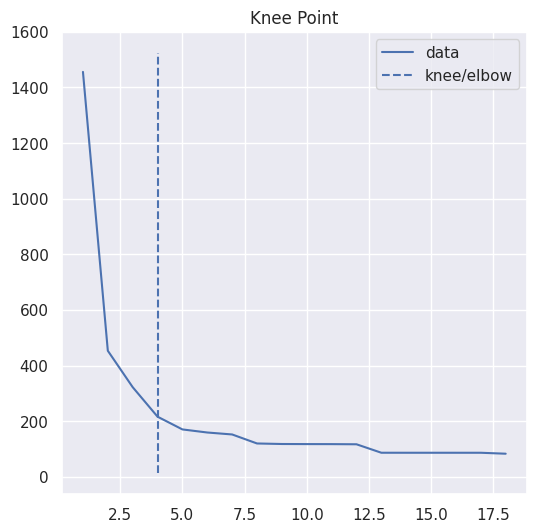

In [28]:
from kneed import KneeLocator

kn = KneeLocator(num_clusters, sse, curve='convex', direction='decreasing')
kn.plot_knee()
optimal_k = kn.knee
optimal_k

In [22]:
kmeans = KMeans(5)
kmeans.fit(x)
clusters_identificados = kmeans.fit_predict(x)
datos_con_clusters = datos.copy()

['Número de hijos(as)', 'Ninguno', 'Primaria', 'Básica', 'Diversificado',
       'Universitario', 'Post grado', 'Doctorado']
datos_con_clusters['Número de hijos(as)'] = x.T[0]
datos_con_clusters['Ninguno'] = x.T[1]
# datos_con_clusters['Primaria'] = x.T[2]
# datos_con_clusters['Básica'] = x.T[3]
# datos_con_clusters['Diversificado'] = x.T[4]
# datos_con_clusters['Post grado'] = x.T[5]
# datos_con_clusters['Doctorado'] = x.T[6]
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters, 
                 x = 'Número de hijos(as)', 
                 y = 'Ninguno', 
                 color = "Cluster",
#                 size = '', 
                )
fig.show()


In [23]:
import plotly.express as px
kmeans = KMeans(3)
kmeans.fit(x)
clusters_identificados = kmeans.fit_predict(x)
clusters_identificados.shape

(208,)

In [24]:
datos['cluster'] = clusters_identificados
datos

Número de hijos(as)  Ninguno  Primaria  Básica  Diversificado  \
1                     1    12790     40261   23825          29553   
2                     2    11270     38161   17748          18631   
3                     3     9822     26367    8798           8307   
4                     4     7831     14330    2963           2071   
5                     5     6179      7342     972            567   
..                  ...      ...       ...     ...            ...   
226                  14      136        37       0              0   
227                  15       65        15       0              0   
228                  16       18         8       0              0   
229                  17        9         1       0              0   
230                  18        3         1       0              0   

     Universitario  Post grado  Doctorado  cluster  
1             2803          91          0        2  
2             1937          28          0        0  
3              792           0          0        0  
4              149           3          0        1  
5               35           1          0        1  
..             ...         ...        ...      ...  
226              0           0          0        1  
227              0           0          0        1  
228              0           0          0        1  
229              0           0          0        1  
230              0           0          0        1  

[208 rows x 9 columns]

### Gráficas de siluetas

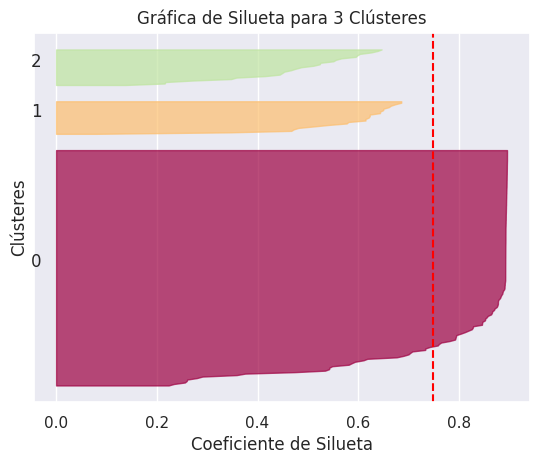

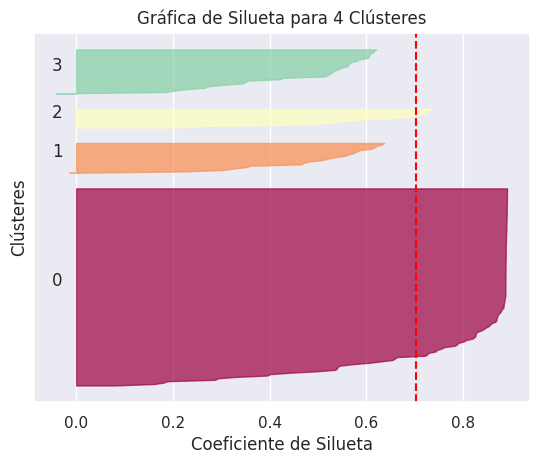

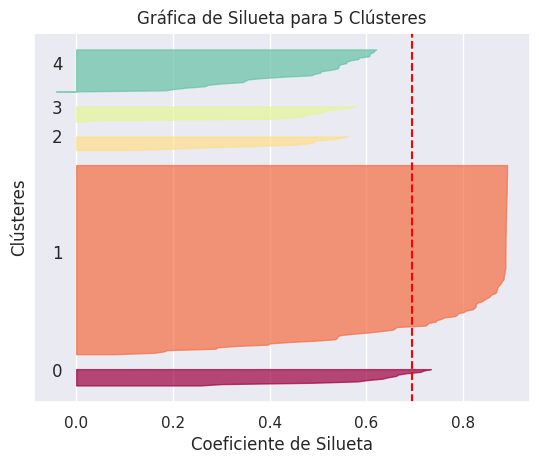

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

X = datos.filter(['Ninguno', 'Primaria', 'Básica', 'Diversificado','Universitario', 'Post grado', 'Doctorado'])

for n_clusters in range(3,6):
    
    # Crear modelo
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # Calcular coeficiente de silueta de cada punto
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    fig, ax = plt.subplots()
    
    pos_i_cluster = 10
    for i in range(n_clusters):
        
        # Obtenemos los valores de coeficiente de silueta para los puntos de cada clúster
        coeficiente = sample_silhouette_values[cluster_labels == i]
        coeficiente.sort()
        
        # Reestablecer posición de eje y para que los clusters no se sobrepongan
        size_cluster_i = coeficiente.shape[0]
        y_upper = pos_i_cluster + size_cluster_i
        color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
        
        # Creamos barra
        ax.fill_betweenx(np.arange(pos_i_cluster, y_upper), 0, coeficiente, facecolor=color, edgecolor=color, alpha=0.7)
        
        # Agregar tag de cantidad de clusters
        ax.text(-0.05, pos_i_cluster + 0.5 * size_cluster_i, str(i))
        
        # Actualizar pos del eje y para la siguiente barra
        pos_i_cluster = y_upper + 10

    ax.set_title("Gráfica de Silueta para {} Clústeres".format(n_clusters))
    ax.set_xlabel("Coeficiente de Silueta")
    ax.set_ylabel("Clústeres")
    
    # Valor medio del coeficiente de silueta para todos los puntos
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])
    plt.show()


El método de la silueta nos permite evaluar la calidad de agrupación de datos en los distintos clusters. Por lo mismo, para este caso decidimos evaluar el performance para un rango de clusters entre 3 a 5.

Como se evidencia en las gráfica obtenidas la cantidad de clústeres óptima es de 3, ya que el promedio del coeficiente de silueta es bastante cercano a 1.  Esto indica que los elementos se encuentran correctamente clasificados dentro del clúster y que hay una buena separación entre los mismos.

Este resultado se complementa con el obtenido mediante el método del codo, que también sugiere que la cantidad óptima de clústeres es 3.

### Interpretación de grupos

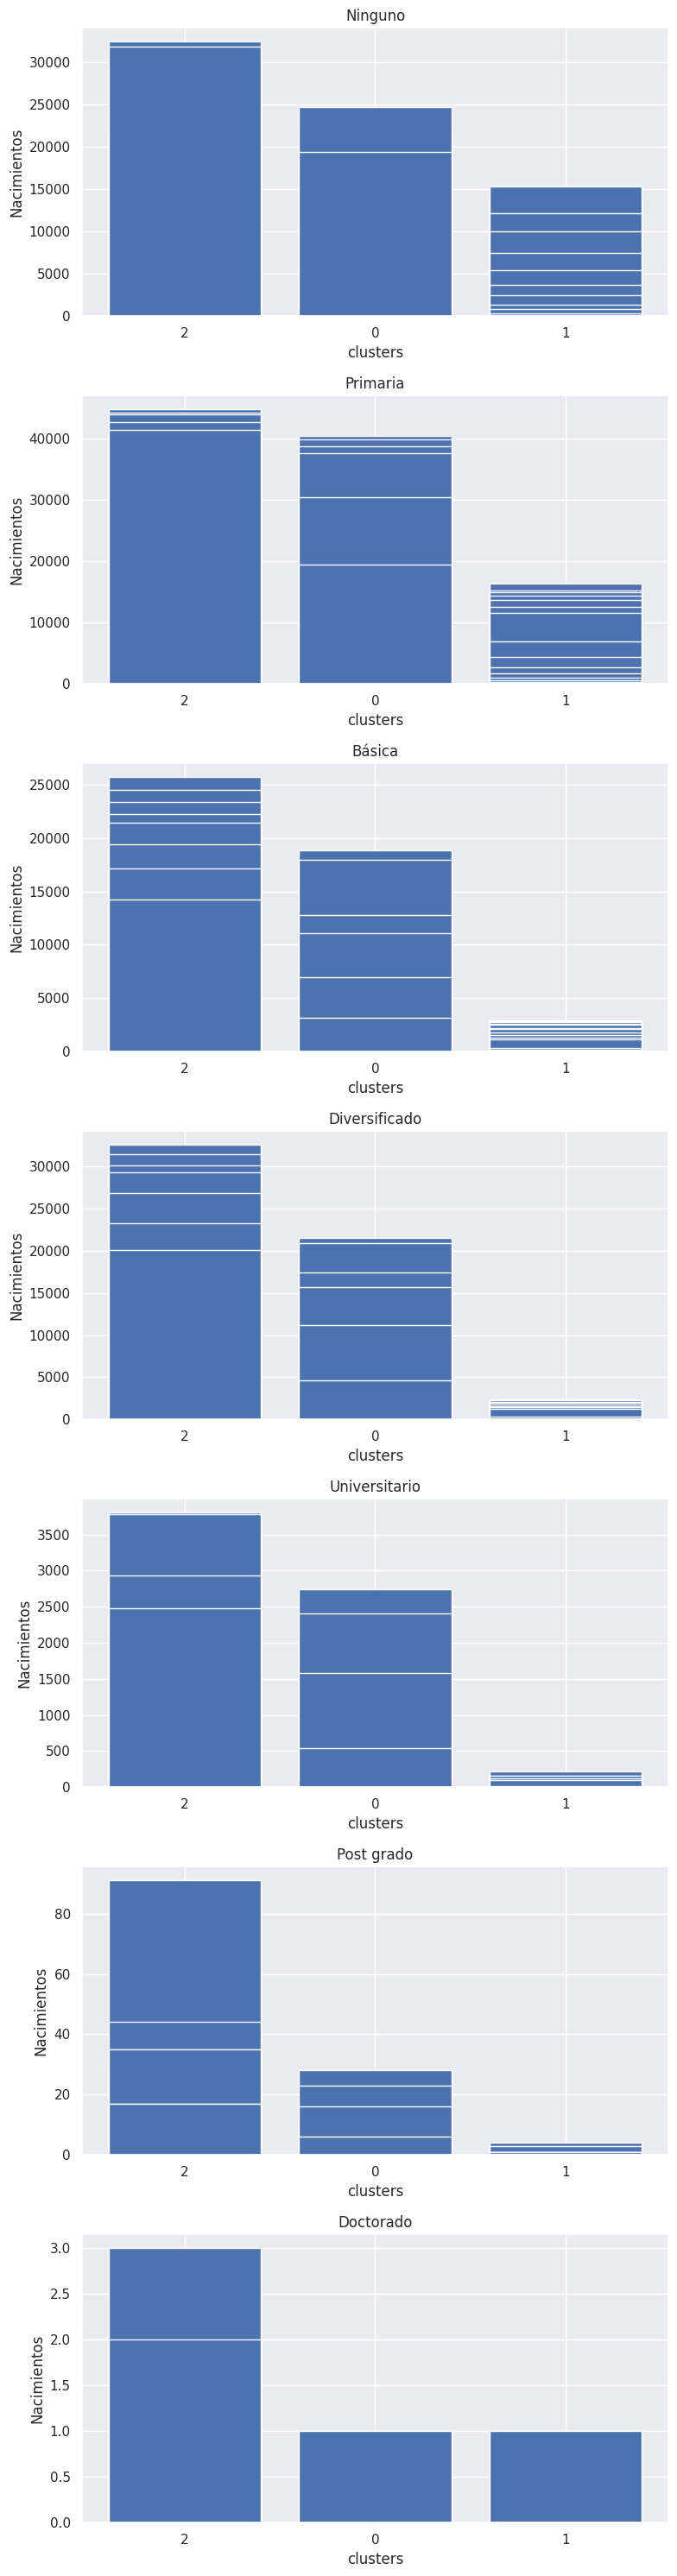

In [26]:
data_barras = datos.iloc[:,1:-1]

x_values = datos.iloc[:, -1].astype(str)

# Crear histogramas por columna con valores en el eje x
fig, axs = plt.subplots(nrows=len(data_barras.columns), figsize=(8, 30))
for i, column in enumerate(data_barras.columns):
    axs[i].bar(x_values, data_barras[column])
    axs[i].set_xlabel('clusters')
    axs[i].set_ylabel('Nacimientos')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

Como se puede ver en los gráficos de barras generados anteriormente con los clústeres obtenidos mediante el uso de kneed y lo observado en la tabla, se pueden definir los siguientes grupos:

- clúster "2": Madres que tienen de 1 a 2 hijos

- clúster "0": Madres que tienen de 3 a 6 hijos

- clúster "1": Madres que tienen de 6 hijos en adelante

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0c624580-60d9-4451-8006-00cdcc3869a8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>